# Graph

In [35]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
from __future__ import annotations
import pickle
import pandas as pd

from collections import defaultdict, deque
from typing import List, DefaultDict, Deque, Dict
from pandas import DataFrame
AdjacencyList = DefaultDict[str, List[str]]
Levels = List[List[Dict]]

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')


def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)


def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)


In [61]:
# !pip install nb_mypy


In [78]:
%load_ext nb_mypy


The nb_mypy extension is already loaded. To reload it, use:
  %reload_ext nb_mypy


In [7]:
s:str = 1

## Test

### visualization

#### v1

In [23]:
from netgraph import Graph
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
# set_matplotlib_formats('svg')

In [24]:
import pandas as pd
gtest = pd.read_csv('data/info/graph.csv')
gtest.shape


(18, 5)

In [26]:
unq_edges = [[u, v] for u, v in gtest[['parent_paper_uuid', 'uuid']].values]
unq_edges[:5]


[[-1, 1], [1, 2], [1, 3], [1, 4], [3, 6]]

In [115]:
from random import randbytes
def getRandomColor():
    return f"#{randbytes(3).hex()}"
getRandomColor()

'#af57b5'

In [3]:
uid_to_node_label = {}
for i, row in gtest.iterrows():
	uuid = row['uuid']
	name = row['name']
	uid_to_node_label[uuid] = f"{name}:{uuid}"
print(uid_to_node_label)
		


{1: 'A:1', 2: 'B:2', 3: 'C:3', 4: 'D:4', 6: 'E:6', 7: 'F:7', 8: 'G:8', 10: 'G:10', 5: 'I:5', 9: 'I:9', 11: 'I:11', 14: 'J:14', 15: 'J:15', 16: 'J:16', 12: 'J:12', 17: 'J:17', 18: 'J:18', 19: 'J:19'}


In [4]:
nodes = gtest['name'].unique().tolist()
nodes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J']

In [5]:
"A(1)".find('B')

-1

In [6]:
# nodes_color = []
# for i, node in enumerate(nodes):
# 	nodes_color.append((node, getRandomColor()))
# nodes_color
nodes_color = [('A', '#c967b0'),
('B', '#c64892'),
('C', '#6f29e2'),
('D', '#f572ed'),
('E', '#406315'),
('F', '#531f38'),
('G', '#70dcca'),
('I', '#c4b1e8'),
('J', '#47df16')]
#[('A', '#11aff9'),
# ('B', '#951494'),
# ('C', '#cafd7c'),
# ('D', '#4900dc'),
# ('E', '#990a34'),
# ('F', '#a70bca'),
# ('G', '#7c770d'),
# ('I', '#31c2d7'),
# ('J', '#0319b1')]


In [10]:
uid_color = {}
for k ,v in uid_to_node_label.items():
	for i, x in enumerate(nodes_color):
		if v.find(x[0]) != -1:
			uid_color[k] = x[1]

print(uid_color)


{1: '#c967b0', 2: '#c64892', 3: '#6f29e2', 4: '#f572ed', 6: '#406315', 7: '#531f38', 8: '#70dcca', 10: '#70dcca', 5: '#c4b1e8', 9: '#c4b1e8', 11: '#c4b1e8', 14: '#47df16', 15: '#47df16', 16: '#47df16', 12: '#47df16', 17: '#47df16', 18: '#47df16', 19: '#47df16'}


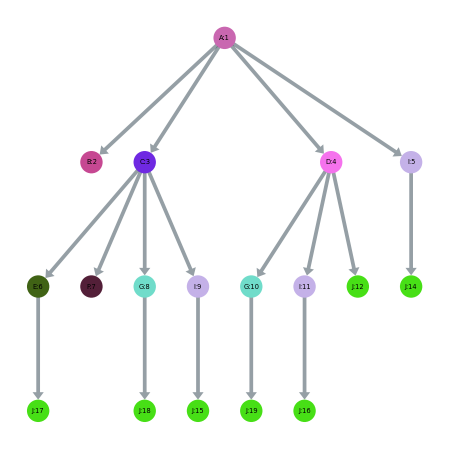

In [11]:
from netgraph import Graph

fig, ax = plt.subplots(figsize=(8,8))
Graph(unq_edges[1:], ax=ax, root="1", node_layout='dot',
      arrows=True, prettify=True, node_width = 4,node_labels=uid_to_node_label, node_color=uid_color, node_edge_width=0
      )
plt.show()


In [28]:
edges = [[u, v] for u, v in gtest[['parent_paper_id', 'paper_id']].values]
edges[:5]

[['-1', 'A'], ['A', 'B'], ['A', 'C'], ['A', 'D'], ['C', 'E']]

In [13]:
nodes_color


[('A', '#c967b0'),
 ('B', '#c64892'),
 ('C', '#6f29e2'),
 ('D', '#f572ed'),
 ('E', '#406315'),
 ('F', '#531f38'),
 ('G', '#70dcca'),
 ('I', '#c4b1e8'),
 ('J', '#47df16')]

In [14]:
# convert to list of tuples to dict
colors = {t[0]:t[1] for t in nodes_color}
colors


{'A': '#c967b0',
 'B': '#c64892',
 'C': '#6f29e2',
 'D': '#f572ed',
 'E': '#406315',
 'F': '#531f38',
 'G': '#70dcca',
 'I': '#c4b1e8',
 'J': '#47df16'}

c:\Users\soiko\anaconda3\lib\site-packages\netgraph\_parser.py:23: UserWarning: Multi-graphs are not properly supported. Duplicate edges are plotted as a single edge; edge weights (if any) are summed.
  warnings.warn(msg)


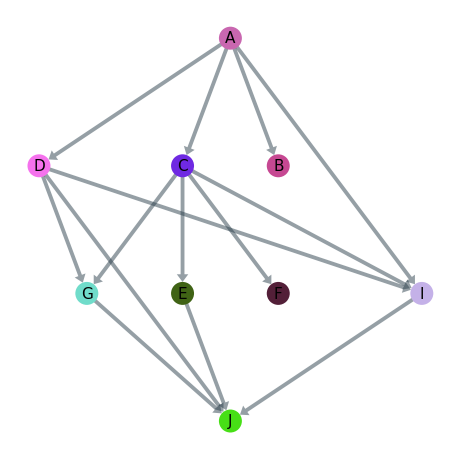

In [15]:
from netgraph import Graph

fig, ax = plt.subplots(figsize=(8, 10))
Graph(edges[1:], ax=ax, root = "A", node_layout='dot', 
      arrows=True, prettify=True, node_labels= True, node_color=colors, node_edge_width=0
      )
plt.show()


#### graph algo

In [44]:
import pandas as pd
from __future__ import annotations
from collections import defaultdict, deque
from typing import List, DefaultDict, Deque, Dict
AdjacencyList = DefaultDict[str, List[str]]
Levels = List[List[Dict]]
from pandas import DataFrame


In [49]:
class GraphManager:
	def __init__(self) -> None:
		self.adjacencyListUnique: AdjacencyList = defaultdict(list)
		self.adjacencyListActual: AdjacencyList = defaultdict(list)
		self.inf: DataFrame|None = None
		

	@classmethod
	def init_from_csv(cls, csv_path: str) -> Graph:
		g = cls()
		g.inf = pd.read_csv(csv_path)
		print(g.inf.shape)
		for _, row in g.inf.iterrows():
			g.addEdge(str(row['parent_paper_uuid']), str(row['uuid']), unique=True)
			g.addEdge(row['parent_paper_id'], row['paper_id'], unique=False)
		return g

	def addEdge(self, parent_paper_uuid: str, child_id: str,unique ) -> None:
		if unique:
			self.adjacencyListUnique[parent_paper_uuid].append(child_id)
		else:
			self.adjacencyListActual[parent_paper_uuid].append(child_id)
		

	def getPaths(self, s, d,unique=True) -> List[List[str]]:
		# Mark all the vertices as not visited
		# visited = {}
		# for i in self.adjacencyListActual:
		# 	visited[i] = False
		# 	for j in self.adjacencyListActual[i]:
		# 		visited[j] = False

		self.path = []
		self.ans = []

		def dfs(root):
			self.path.append(root)
			if root == d:
				if not unique:
					self.ans.append(self.path)
				else:
					self.ans = self.path
				
				return
			if not unique:
				for child in self.adjacencyListActual[root]:
					dfs(child)
						# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
			else:
				for child in self.adjacencyListUnique[root]:
					dfs(child)
						# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
		dfs(s)
		
		return self.ans


gt = GraphManager.init_from_csv('data/info/graph.csv')
print(gt.getPaths('1', '14', unique=True))
print(gt.getPaths('1', '17', unique=True))
print(gt.getPaths('A', 'I', unique=False))
print(gt.getPaths('A', 'J' ,unique=False))


(18, 5)
['1', '5', '14']
['1', '3', '6', '17']
[['A', 'C', 'I'], ['A', 'D', 'I'], ['A', 'I']]
[['A', 'C', 'E', 'J'], ['A', 'C', 'G', 'J'], ['A', 'C', 'G', 'J'], ['A', 'C', 'I', 'J'], ['A', 'C', 'I', 'J'], ['A', 'C', 'I', 'J'], ['A', 'D', 'G', 'J'], ['A', 'D', 'G', 'J'], ['A', 'D', 'I', 'J'], ['A', 'D', 'I', 'J'], ['A', 'D', 'I', 'J'], ['A', 'D', 'J'], ['A', 'I', 'J'], ['A', 'I', 'J'], ['A', 'I', 'J']]


#### Vis main

In [54]:
import pandas as pd
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape

(24387, 29)

In [41]:
inf.columns

Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_id', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'freshness_avg',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'level_no', 'similarity_with_root', 'similarity_with_immediate_parent'],
      dtype='object')

In [39]:
inf.drop(['paper_type_label'], axis=1, inplace=True)


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
inf['paper_type_label'] = le.fit_transform(inf['paper_type'])
inf['paper_type_label'].unique()


array([0, 5, 3, 1, 2, 4])

In [50]:
def f(p):
	if p == 'Article':
		return 1
	elif p == "Conference Paper":
		return 2
	elif p == "Literature Review":
		return 3
	elif p == "Book":
		return 4
	elif p == "Chapter":
		return 5
	else:
		return np.nan


inf['paper_type_label'] = inf.paper_type.apply(f)
inf['paper_type_label'].unique()


array([ 1., nan,  2.,  4.,  5.,  3.])

In [51]:
inf[['paper_type', 'paper_type_label']].drop_duplicates()



,paper_type,paper_type_label
0,Article,1.0
1,NaN,NaN
2,Conference Paper,2.0
88,Book,4.0
272,Chapter,5.0
408,Literature Review,3.0


In [53]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)


In [25]:
inf.head(3)

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,citation_count_min_max_norm,age_min_max_norm,paper_type_label,freshness_avg,degree_centrality,closeness_centrality,betweenness_centrality,level_no,similarity_with_root,similarity_with_immediate_parent
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,...,NaN,NaN,NaN,NaN,0.004205,0.000000,0.000000,0,1.000000,NaN
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,NaN,...,0.000506,0.042424,0.76,0.512602,0.004744,0.002620,0.000475,1,0.644213,0.644213
2,be2af112-6c57-4598-9813-d02fff71055b,05dec9ff0f48f45b09245ba0354748961f18ff77,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Citation-Enhanced Keyphrase Extraction from Re...,61,100,10,2014.0,Conference Paper,...,0.000144,0.018182,0.80,0.596274,0.006469,0.000108,0.000004,1,0.349922,0.349922


For Unique Paper:

In [224]:
unq_edges = [[u,v ] for u,v in inf[['parent_paper_uuid', 'uuid']].values]

unq_edges[:5]


[[nan, '8bde6cb8-296d-4593-883f-b768103e1e69'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  'ade6eb61-946a-49f3-835d-74804cb9de3e'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  'be2af112-6c57-4598-9813-d02fff71055b'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  '899a51ab-0231-4baf-bd9e-a1b15c743623'],
 ['8bde6cb8-296d-4593-883f-b768103e1e69',
  '62635add-b59a-45cb-8c3b-b293fc400a5d']]

In [248]:

def get_nedges_with_attributes(e, n, root, node_size, get_edge_color_fn):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	node_edge_color = dict()
	
	for n in All:
		level = g.get_level_no_by_uid(
			levelsOrderList=g.levelOrderList, id=n)
		if n == root:
			node_color[n] = 'red'
			# node_edge_color[n] = 'black'
		else:
			node_color[n] = get_level_color(level)
	
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size

	edges_color = get_edge_color_fn(e)

	return [e, node_color, node_edge_color, node_size_dict, edges_color]


def get_level_color(level):
	if level == 1:
		return 'Blue'
	elif level == 2:
		return 'Purple'
	elif level == 3:
		return 'Pink'

def get_edge_color(e):
	edges_color = dict()
	for i in e:
		level = g.get_level_no_by_uid(levelsOrderList=g.levelOrderList, id=i[0])

		if i[0] == '8bde6cb8-296d-4593-883f-b768103e1e69':
			edges_color[(i[0], i[1])] = 'red'
		else:
			edges_color[(i[0], i[1])] = get_level_color(level)

	return edges_color
	
# edge_width=.2 | 150 
# edge_width=.05 | 1500	

r = get_nedges_with_attributes(
	e=unq_edges[1:], n=1500, root="8bde6cb8-296d-4593-883f-b768103e1e69", node_size=.3, get_edge_color_fn=get_edge_color)


def fn():
	fig, ax = plt.subplots(figsize=(30, 30))
	Graph(r[0], node_size=r[3], node_color=r[1], edge_color=r[4], node_edge_width=0,node_edge_color=None,
	      edge_width=.05, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


For Duplicated Papers:

In [219]:
edges = [[u, v] for u, v in inf[['parent_paper_id', 'paper_id']].values]
edges[:5]


[[nan, 'b0d555a9ea67285fccd2ef8d887907bcc811f67a'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '03589e1917debe6df148cac8963fd008e4140237'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '12355df323e6a82030fa6c98e97b512121367ece'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1736c33defcf1dda6742e4d577b7e0ce9b63e4fc']]

In [238]:
def get_nedges_with_attributes(e, n, root, node_size, get_edge_color_fn):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	node_edge_color = dict()
	for n in All:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=n)
		in_same_level = checkIfDuplicates(level)
		if n == root:
			node_color[n] = 'red'
		else:
			level_count = len(level)
			if level_count == 1:
				node_color[n] = get_level_color(level[0])
			elif level_count > 1:
				if in_same_level:
					node_color[n] = "lime"
				else:
					node_color[n] = "cyan"
			elif level_count == 0:
				node_color[n] = "black"
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size

	edges_color = get_edge_color_fn(e)

	return [e, node_color, node_edge_color, node_size_dict, edges_color]

def checkIfDuplicates(l):
    if len(l) == len(set(l)):
        return False
    else:
        return True

def get_level_color(level):
	if level == 1:
		return 'Blue'
	elif level == 2:
		return 'Purple'
	elif level == 3:
		return 'Pink'

def get_edge_color(e):
	edges_color = dict()
	for i in e:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=i[0])
		in_same_level = checkIfDuplicates(level)
		if i[0] == 'b0d555a9ea67285fccd2ef8d887907bcc811f67a':
			edges_color[(i[0], i[1])] = 'red'
		else:
			level_count = len(level)
			
			if level_count == 1:
				edges_color[(i[0], i[1])] = get_level_color(level[0])
			elif level_count > 1:
				if in_same_level:
					edges_color[(i[0], i[1])] = "lime"
				else:
					edges_color[(i[0], i[1])] = "cyan"
			elif level_count == 0:
				edges_color[(i[0], i[1])] = "black"
	return edges_color
	
	
r = get_nedges_with_attributes(
	e=edges[1:], n=150, root="b0d555a9ea67285fccd2ef8d887907bcc811f67a", node_size=.3, get_edge_color_fn=get_edge_color)

# edge_width=.2 | 150
# edge_width=.05 | 1500
def fn():
	fig, ax = plt.subplots(figsize=(8, 16))
	Graph(r[0], node_size=r[3], node_color=r[1], edge_color=r[4], node_edge_width=0,node_edge_color=None,
	      edge_width=.2, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


<!-- v2: -->

In [5]:
def get_nedges_with_attributes(e, n, root, node_size, get_edge_color_fn):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	node_edge_color = dict()
	cyan_assinged = False
	lime_assinged = False
	# lime_
	for n in All:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=n)
		in_same_level = checkIfDuplicates(level)
		# print(n, in_same_level)
		if in_same_level:
			if not cyan_assinged:
				node_color[n] = "cyan"
				cyan_assinged = True
			else:
				node_color[n] = "lime"
				lime_assinged = True
		else:
			node_color[n] = "white"
			node_edge_color[n] = "black"
			
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size



	return [e, node_color, node_edge_color, node_size_dict]

def checkIfDuplicates(l):
    if len(l) == len(set(l)):
        return False
    else:
        return True

def get_level_color(level):
	if level == 1:
		return 'Blue'
	elif level == 2:
		return 'Purple'
	elif level == 3:
		return 'Pink'

def get_edge_color(e):
	edges_color = dict()
	for i in e:
		level = g.get_levels_no_by_paper_id(
			levelsOrderList=g.levelOrderList, id=i[0])
		in_same_level = checkIfDuplicates(level)
		if i[0] == 'b0d555a9ea67285fccd2ef8d887907bcc811f67a':
			edges_color[(i[0], i[1])] = 'red'
			
		else:
			level_count = len(level)
			
			if level_count == 1:
				edges_color[(i[0], i[1])] = get_level_color(level[0])
			elif level_count > 1:
				if in_same_level:
					edges_color[(i[0], i[1])] = "lime"
				else:
					edges_color[(i[0], i[1])] = "cyan"
			elif level_count == 0:
				edges_color[(i[0], i[1])] = "black"
	return edges_color
	
	
r = get_nedges_with_attributes(
	e=edges[1:], n=2500, root="b0d555a9ea67285fccd2ef8d887907bcc811f67a", node_size=.3, get_edge_color_fn=get_edge_color)

# edge_width=.2 | 150
# edge_width=.05 | 1500
def fn():
	fig, ax = plt.subplots(figsize=(30,30))
	Graph(r[0], node_size=r[3], node_color=r[1], node_edge_color=r[2] ,node_edge_width=.05,
	      edge_width=.05, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


NameError: name 'edges' is not defined

<!-- v3 -->

In [274]:
All = []
for l in edges[1:150]:
	All.extend(l)  # EXTEND!!! (not append)
All = list(set(All))
len(All)

120

In [276]:
nodes_color = dict()
for n in All:
	nodes_color[n] = getRandomColor()


In [4]:
def get_nedges_with_attributes(e, n, root, node_size):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	nodes_color = dict()
	node_edge_color = dict()
	for n in All:
		nodes_color[n] = getRandomColor()
	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size

	edges_color = get_edge_color(e, nodes_color)

	return [e, nodes_color, node_edge_color, node_size_dict, edges_color]


def get_edge_color(e,nodes_color):
	edges_color = dict()
	for i in e:
		color = nodes_color[i[0]]
		edges_color[(i[0], i[1])] = color
	return edges_color
	
	
r = get_nedges_with_attributes(
	e=edges[1:], n=150, root="b0d555a9ea67285fccd2ef8d887907bcc811f67a", node_size=.3)

# edge_width=.2 | 150
# edge_width=.05 | 1500
def fn():
	fig, ax = plt.subplots(figsize=(30,30))
	Graph(r[0], node_size=r[3], node_color=r[1], edge_color=r[4], node_edge_width=0,node_edge_color=None,
	      edge_width=.2, ax=ax, node_layout='dot', arrows=True, prettify=True)
	plt.show()

# fn()


NameError: name 'edges' is not defined

### Centrality

In [31]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape


(24387, 42)

In [32]:
edges = [[u, v] for u, v in inf[['parent_paper_id', 'paper_id']].values]
edges[:5]


[[nan, 'b0d555a9ea67285fccd2ef8d887907bcc811f67a'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '03589e1917debe6df148cac8963fd008e4140237'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '12355df323e6a82030fa6c98e97b512121367ece'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1736c33defcf1dda6742e4d577b7e0ce9b63e4fc']]

In [33]:
edges = edges[1:]
edges[:5]


[['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '03589e1917debe6df148cac8963fd008e4140237'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '05dec9ff0f48f45b09245ba0354748961f18ff77'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '12355df323e6a82030fa6c98e97b512121367ece'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1736c33defcf1dda6742e4d577b7e0ce9b63e4fc'],
 ['b0d555a9ea67285fccd2ef8d887907bcc811f67a',
  '1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd']]

In [7]:
G = nx.DiGraph(edges)
# https://networkx.org/documentation/stable/reference/algorithms/centrality.html
deg_centrality = nx.degree_centrality(G)
close_centrality = nx.closeness_centrality(G)
bet_centrality = nx.betweenness_centrality(G)
in_deg_centrality = nx.in_degree_centrality(G)
out_deg_centrality = nx.out_degree_centrality(G)
# G is the Karate Club Graph
# ids = [ k for k in deg_centrality.keys() ][1:]
# len(ids)


In [11]:
def get_degree_centrality(row):
	paper_id = row['paper_id']
	for k, v in deg_centrality.items():
		if k == paper_id:
			return v
	return 0
	

In [12]:
def get_closeness_centrality(row):
	paper_id = row['paper_id']
	for k, v in close_centrality.items():
		if k == paper_id:
			return v
	return 0


In [13]:
def get_betweenness_centrality(row):
	paper_id = row['paper_id']
	for k, v in bet_centrality.items():
		if k == paper_id:
			return v
	return 0

In [18]:
def get_in_degree_centrality(row):
	paper_id = row['paper_id']
	for k, v in in_deg_centrality.items():
		if k == paper_id:
			return v
	return 0


In [19]:
def get_out_degree_centrality(row):
	paper_id = row['paper_id']
	for k, v in out_deg_centrality.items():
		if k == paper_id:
			return v
	return 0


In [10]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape

(24387, 36)

In [14]:
inf['degree_centrality'] = inf.apply(get_degree_centrality, axis='columns')


In [15]:
inf['closeness_centrality'] = inf.apply(
    get_closeness_centrality, axis='columns')


In [20]:
inf['in_deg_centrality'] = inf.apply(
    get_in_degree_centrality, axis='columns')


In [21]:
inf['out_deg_centrality'] = inf.apply(
    get_out_degree_centrality, axis='columns')


In [46]:
harmonic_centrality = nx.harmonic_centrality(G)

def get_harmonic_centrality(row):
	paper_id = row['paper_id']
	for k, v in harmonic_centrality.items():
		if k == paper_id:
			return v
	return 0

inf['harmonic_centrality'] = inf.apply(
    get_harmonic_centrality, axis='columns')


In [47]:
data = inf.iloc[1:]
data = data[data['level_no'] != 4]


In [52]:
inf.head(2)

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l2,similarity_with_l0_em,similarity_with_l1_em,similarity_with_l2_em,similarity_with_immediate_parent_em,freshness,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.004205,2.168855e-26,0.000000
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,NaN,...,NaN,0.72775,NaN,NaN,0.665641,0.470477,0.002588,0.002156,3.035364e-18,0.000475


<AxesSubplot:xlabel='level_no', ylabel='harmonic_centrality'>

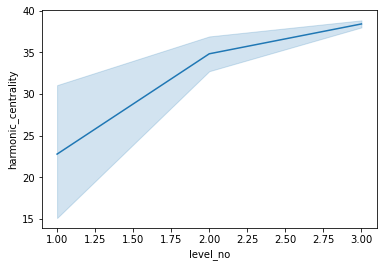

In [48]:
sns.lineplot(x="level_no", y="harmonic_centrality", data=data)


In [193]:
# plt.figure(figsize=(12, 12))
# plt.subplot(2,2, 1)  
# sns.pointplot(x="level_no", y="degree_centrality", data=data)
# plt.subplot(2, 2, 2)  
# sns.pointplot(x="level_no", y="closeness_centrality", data=data)
# plt.subplot(2,2, 3)  
# sns.pointplot(x="level_no", y="betweenness_centrality", data=data)
# plt.subplot(2, 2, 4)  
# sns.pointplot(x="level_no", y="age", data=inf)
# plt.show()


In [53]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

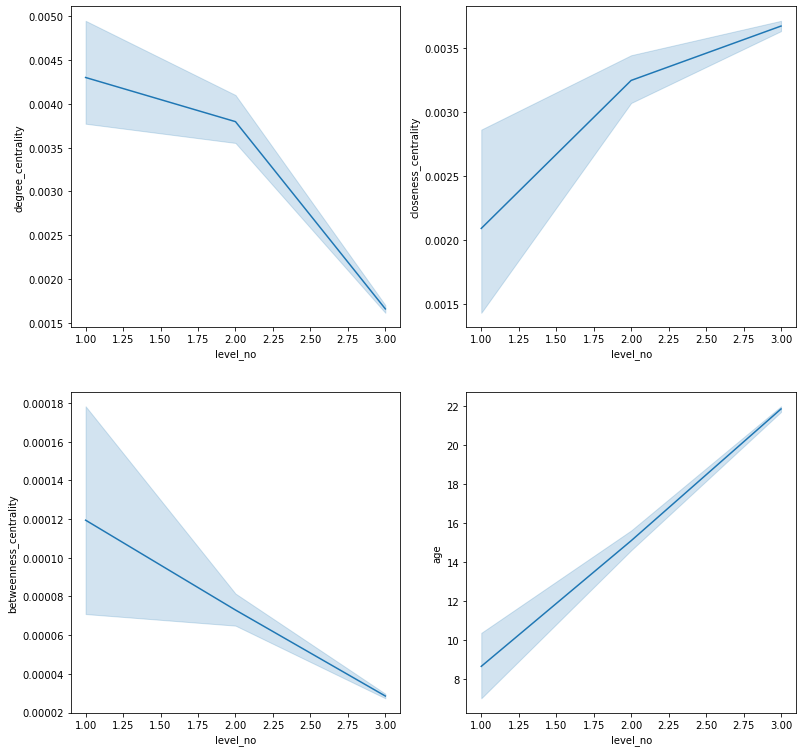

In [207]:
plt.figure(figsize=(13, 13))
plt.subplot(2, 2, 1)
sns.lineplot(x="level_no", y="degree_centrality", data=data)
plt.subplot(2, 2, 2)
sns.lineplot(x="level_no", y="closeness_centrality", data=data)
plt.subplot(2, 2, 3)
sns.lineplot(x="level_no", y="betweenness_centrality", data=data)
plt.subplot(2, 2, 4)
sns.lineplot(x="level_no", y="age", data=data)
plt.show()

## Graph

### Graph

In [36]:
class InfoManager:
	def __init__(self, file_path: str = None, df: DataFrame = None) -> None:
		if file_path:
			self.inf: DataFrame = pd.read_csv(file_path)
		elif df is not None:
			self.inf = df

	def get_info_by_uuid(self, id: str) -> List[dict]:
		f = self.inf[self.inf['uuid'] == id]
		return f.to_dict('records')[0]

	def get_info_by_uuidIds(self, ids: List[str]) -> List[dict]:
		f = self.inf[self.inf['uuid'].isin(ids)]
		return f.to_dict('records')

	def get_info_by_key(self, key: str, value: str) -> List[dict]:
		f = self.inf[self.inf[key] == value]
		return f.to_dict('records')

	def get_info_keys_by_uuid(self, id: str, keys: List[str]) -> Dict:
		f = self.inf[self.inf['uuid'] == id]
		return f.iloc[0][keys].to_dict()

	def get_refs_by_uuid(self, uuid: str) -> List[str]:
		f = self.inf[self.inf['parent_paper_uuid'] == uuid]
		return f.to_dict('records')

	def get_parent_info_by_child_id(self, child_id: str) -> List[dict]:
		f = self.inf[self.inf['uuid'] == child_id]
		parent_paper_uuid = f.iloc[0]['parent_paper_uuid']
		p = self.inf[self.inf['uuid'] == parent_paper_uuid]
		return p.to_dict('records')[0]


In [40]:
class GraphManager:
	def __init__(self) -> None:
		self.adjacencyListUnique: AdjacencyList = defaultdict(list)
		self.adjacencyListActual: AdjacencyList = defaultdict(list)
		self.levelOrderList: Levels = []
		self.levelOrderIdsList: Levels = []
		self.inf: DataFrame|None = None
		self.im: InfoManager|None = None
		

	@classmethod
	def init_from_csv(cls, csv_path: str,read_full:bool = False ) -> GraphManager:
		g = cls()
		# if not read_full:
		# 	g.inf = pd.read_csv(csv_path, usecols=['paper_id', 'uuid', 'parent_paper_uuid'])
		# else:
			# g.inf = pd.read_csv(csv_path)
		g.inf = pd.read_csv(csv_path)
		g.im = InfoManager(df=g.inf)

		print(g.inf.shape)
		for _, row in g.inf.iterrows():
			g.addEdge(row['parent_paper_uuid'], row['uuid'], unique=True)
			g.addEdge(row['parent_paper_id'], row['paper_id'], unique=False)
		return g

	def addEdge(self, parent_paper_uuid: str, child_id: str, unique) -> None:
		if unique:
			self.adjacencyListUnique[parent_paper_uuid].append(child_id)
		else:
			self.adjacencyListActual[parent_paper_uuid].append(child_id)

	def levelOrderFull(self, root: str) -> List[List[Dict]]:
		self.levelOrderList = []
		q: Deque = deque()
		q.append(root)
		while q:
			currentLevel: List[Dict] = []
			currentQLength = len(q)
			for _ in range(currentQLength):
				currentNode = q.popleft()
				# currentLevel.append(currentNode)
				p = self.im.get_info_keys_by_uuid(currentNode, ['paper_id', 'uuid', 'parent_paper_uuid'])
				currentLevel.append(p)
				for children in self.adjacencyListUnique[currentNode]:
					q.append(children)

			self.levelOrderList.append(currentLevel)
		
		return self.levelOrderList
	
	def levelOrderIdsOnly(self, root: str) -> List[List[Dict]]:
		self.levelOrderIdsList = []
		q: Deque = deque()
		q.append(root)
		while q:
			currentLevel: List[Dict] = []
			currentQLength = len(q)
			for _ in range(currentQLength):
				currentNode = q.popleft()
				currentLevel.append(currentNode)
				for children in self.adjacencyListUnique[currentNode]:
					q.append(children)

			self.levelOrderIdsList.append(currentLevel)

		return self.levelOrderIdsList
	
	def get_level_no_by_uid(self, levelsOrderList: List[List[Dict]], id: str) -> str:
		for i, l in enumerate(levelsOrderList):
			for d in l:
				if d['uuid'] == id:
					return i
		return "" 

	def get_levels_no_by_paper_id(self, levelsOrderList: List[List[Dict]], id: str) -> List[str]:
		inLevels = []
		for i, l in enumerate(levelsOrderList):
			for d in l:
				if d['paper_id'] == id:
					inLevels.append(i)
		return inLevels
			
	# def alreadyProcessed(self, id: str, levels: List[List[str]]) -> bool:
	# 	print(len(levels))
	# 	for i in range(len(levels) - 1):
	# 		print(i)
	# 		# if id in levels[i]:
	# 		# return True
	
	def getPaths(self, s, d, unique=True) -> List[List[str]]:
		self.path = []
		self.ans = []

		def dfs(root):
			self.path.append(root)
			if root == d:
				if not unique:
					self.ans.append(self.path)
				else:
					self.ans = self.path

				return
			if not unique:
				for child in self.adjacencyListActual[root]:
					dfs(child)
					# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
			else:
				for child in self.adjacencyListUnique[root]:
					dfs(child)
					# after finishing traverse the child node, remove it from current path
					self.path = self.path[:-1]
		dfs(s)

		return self.ans


In [41]:
# g = Graph.init_from_csv('data/info/info_full_ss.csv')
# g = Graph.init_from_csv('data/info/info_full_ss.csv',read_full=True)
g = GraphManager.init_from_csv('data/info/info_full_ss_new_x.csv',read_full=True)

(24387, 42)


In [222]:
# g.inf.iloc[1000]

In [43]:
g.getPaths('8bde6cb8-296d-4593-883f-b768103e1e69',
           'c25fdc24-177a-4155-a288-e26745623089')


['8bde6cb8-296d-4593-883f-b768103e1e69',
 '47dfc1c7-8a74-47b7-8f3c-10783e2f721b',
 'c25fdc24-177a-4155-a288-e26745623089']

In [65]:
l_full = g.levelOrderFull(root="8bde6cb8-296d-4593-883f-b768103e1e69")
print(f"total levels: {len(l_full)}")
for i, level in enumerate(l_full):
	print(f"level {i}: {len(level)}")

total levels: 5
level 0: 1
level 1: 39
level 2: 1037
level 3: 23249
level 4: 61


In [66]:
add_to_pickle('data/info/graph_serialized.dat', g)

In [67]:
g_serialized = read_from_pickle('data/info/graph_serialized.dat')

In [68]:
g = GraphManager()
g = g_serialized
g.inf.shape


(24387, 29)

In [69]:
g.levelOrderList[0][0]['paper_id']

'b0d555a9ea67285fccd2ef8d887907bcc811f67a'

In [70]:
len(g.levelOrderList)

5

In [71]:
g.get_levels_no_by_paper_id(levelsOrderList=g.levelOrderList, id="b0d555a9ea67285fccd2ef8d887907bcc811f67a")

[0]

In [72]:
g.im.get_info_keys_by_uuid(
    "ade6eb61-946a-49f3-835d-74804cb9de3e", ['paper_id', 'uuid', 'parent_paper_uuid'])


{'paper_id': '03589e1917debe6df148cac8963fd008e4140237',
 'uuid': 'ade6eb61-946a-49f3-835d-74804cb9de3e',
 'parent_id': '8bde6cb8-296d-4593-883f-b768103e1e69'}

In [73]:
print(g.get_levels_no_by_paper_id(
    levelsOrderList=g.levelOrderList, id="03589e1917debe6df148cac8963fd008e4140237")
)


[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Find child older than parent:

In [129]:
count = []
for i, level in enumerate(l_full):
	# print(f"level {i}: {len(level)}")
	if i == 3:
		break
	for paper in level:
		parent_uuid = paper['parent_paper_uuid']
		if pd.isnull(parent_uuid):
			continue
		root = g.im.get_info_keys_by_uuid(parent_uuid,
									['title', 'uuid', 'paper_id', 'published_date'])
		published_date = root['published_date']
		paper_id = root['paper_id']
		title = root['title']

		refs = g.im.get_refs_by_uuid(parent_uuid)
		for ref in refs:
			child_published_date = ref['published_date']
			child_uuid = ref['uuid']
			child_title = ref['title']
			child_paper_id = ref['paper_id']
			if child_published_date > published_date:
				count.append((i, paper_id, title, child_paper_id,
								child_title, child_published_date))

In [130]:
count


[]

### EDA

In [30]:
inf = pd.read_csv('data/info/info_full_ss.csv')
inf.shape

(24750, 17)

In [12]:
papers_in_l1 = [d['paper_id'] for d in l_full[1]]
papers_in_l2 = [d['paper_id'] for d in l_full[2]]
papers_in_l3 = [d['paper_id'] for d in l_full[3]]
print(len(papers_in_l1))
print(len(papers_in_l2))
print(len(papers_in_l3))


39
1037
23249


In [13]:
# unique in python list
papers_in_l1 = list(set(papers_in_l1))
papers_in_l2 = list(set(papers_in_l2))
papers_in_l3 = list(set(papers_in_l3))
print(len(papers_in_l1))
print(len(papers_in_l2))
print(len(papers_in_l3))

		

39
627
9172


In [4]:
import pandas as pd
done = pd.read_csv("data/info/done.csv")
print(done.shape)
donep = done.paper_id.unique()
print(len(donep))
donep[0]

(22256, 2)
8030


'b0d555a9ea67285fccd2ef8d887907bcc811f67a'

In [29]:
missing_in_l1 = []
for p in papers_in_l1:
	if p not in donep:
		missing_in_l1.append(p)
print(f"p:{len(papers_in_l1)}")
print(f"m:{len(missing_in_l1)}")
print(f"d:{len(papers_in_l1) - len(missing_in_l1)}")


p:39
m:0
d:39


In [30]:
missing_in_l2 = [] 
for p in papers_in_l2:
	if p not in donep:
		missing_in_l2.append(p)
print(f"p:{len(papers_in_l2)}")
print(f"m:{len(missing_in_l2)}")
print(f"d:{len(papers_in_l2) - len(missing_in_l2)}")


p:627
m:76
d:551


In [31]:
missing_in_l3 = []
for p in papers_in_l3:
	if p not in donep:
		missing_in_l3.append(p)
print(f"m:{len(missing_in_l3)}")
print(f"p:{len(papers_in_l3)}")
print(f"d:{len(papers_in_l3) - len(missing_in_l3)}")


m:1846
p:9172
d:7326


In [25]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt") if os.stat(f"data/papers/{f.name}").st_size > 1]
len(text_files_id_list),text_files_id_list[:2]

(7235,
 ['0000ff68310e8a43c26371b4f0ff05ddaed93577',
  '0005a4d98ba8ccf0eb944a1a36adadcede25e7f8'])

In [15]:
import os
from pprint import pprint


In [16]:
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf") if os.stat(f"data/papers/{f.name}").st_size > 1]
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt") if os.stat(f"data/papers/{f.name}").st_size > 1]
import pandas as pd

kp = pd.read_csv("data/info/key_phrases_extracted.csv", usecols=['paper_id'])
extracted = kp.paper_id.unique().tolist()

In [28]:
for i, level_iTh_papers_ids in enumerate(g.levelOrderList):
	print(f"{('*'*5)} level {i}  {('*'*5)}")
	print(f"total papers: {len(level_iTh_papers_ids)}")
	downloaded_papers = []
	converted = []
	keyPhraseExtracted = []

	for paper in level_iTh_papers_ids:
		paper_id = paper['paper_id']
		if paper_id in pdf_files_id_list:
			downloaded_papers.append(paper)
		if paper_id in text_files_id_list:
			converted.append(paper)
		if paper_id in extracted:
			keyPhraseExtracted.append(paper)
	downloaded_papers_unique = list(
		set([p['paper_id'] for p in downloaded_papers]))
	print(f"downloaded papers:{len(downloaded_papers_unique)}")
	print(f"total covered:{len(downloaded_papers)}")
	print(f"text converted:{len(converted)}")
	print(f"key-phrase extracted:{len(keyPhraseExtracted)}")
	print(f"key-phrase extraction percentage in {i} level:{round(len(keyPhraseExtracted)/len(level_iTh_papers_ids),2)}%")
	print()

***** level 0  *****
total papers: 1
downloaded papers:1
total covered:1
text converted:1
key-phrase extracted:1
key-phrase extraction percentage in 0 level:1.0%

***** level 1  *****
total papers: 39
downloaded papers:35
total covered:35
text converted:33
key-phrase extracted:33
key-phrase extraction percentage in 1 level:0.85%

***** level 2  *****
total papers: 1037
downloaded papers:494
total covered:867
text converted:829
key-phrase extracted:806
key-phrase extraction percentage in 2 level:0.78%

***** level 3  *****
total papers: 23249
downloaded papers:6902
total covered:18131
text converted:17207
key-phrase extracted:16439
key-phrase extraction percentage in 3 level:0.71%

***** level 4  *****
total papers: 61
downloaded papers:38
total covered:45
text converted:44
key-phrase extracted:44
key-phrase extraction percentage in 4 level:0.72%



## PDF to TEXT Conversion

In [7]:
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf")]
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]

In [8]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]

In [9]:
os.stat("data/papers/5a4d81c67da140f88de5d8625906a9be17b3af40.txt").st_size


23272

In [10]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]
len(text_files_id_list)

7235

In [11]:
text_yet_to_be_converted =list(set(pdf_files_id_list) - set(text_files_id_list))
len(text_yet_to_be_converted)


334

In [12]:
text_already_converted = list(
    set(pdf_files_id_list) & set(text_files_id_list))
len(text_already_converted)


7234

## TeKET

In [2]:
from algorithms import getWeightedKeyPhrasesUsingTeKET
from pprint import pprint

In [3]:
kp = getWeightedKeyPhrasesUsingTeKET(
    "data/papers/text_demo/b0d555a9ea67285fccd2ef8d887907bcc811f67a-pymupdf-clean.txt")
kp


[('word ', 7396),
 ('keyphra ', 6400),
 ('keyphra extract ', 4956),
 ('document ', 4900),
 ('candid word ', 3136),
 ('unsupervi keyphra extract ', 2904),
 ('posit ', 2500),
 ('proceed ', 2304),
 ('research paper ', 2160),
 ('page ', 2116),
 ('dataset ', 1936),
 ('perform baselin ', 1872),
 ('model ', 1764),
 ('paper ', 1764),
 ('target document ', 1720)]

In [4]:
getWeightedKeyPhrasesUsingTeKET(
    "data/papers/text_demo/b0d555a9ea67285fccd2ef8d887907bcc811f67a-pypdf2-textract-clean.txt")


[('word ', 7396),
 ('keyphra ', 6084),
 ('document ', 4356),
 ('candid word ', 3136),
 ('posit ', 2500),
 ('unsupervi keyphra ', 2496),
 ('dataset ', 1936),
 ('page ', 1764),
 ('perform baselin ', 1700),
 ('target document ', 1640),
 ('rst posit ', 1632),
 ('phrase ', 1600),
 ('positionrank ', 1600),
 ('research paper ', 1400),
 ('inform ', 1296)]

In [142]:
# strip keyphrases
def strip_key_phrases(row):
    if row['key_phrases'] is not None:
        return row['key_phrases'].strip()


df = pd.DataFrame(
    kp, columns=['key_phrases', 'weight'])

df['key_phrases'] = df.apply(strip_key_phrases, axis=1)
# add paper_id column
df.insert(0, 'paper_id', 'b0d555a9ea67285fccd2ef8d887907bcc811f67a')
df

,paper_id,key_phrases,weight
0,b0d555a9ea67285fccd2ef8d887907bcc811f67a,word,7396
1,b0d555a9ea67285fccd2ef8d887907bcc811f67a,keyphra,6400
2,b0d555a9ea67285fccd2ef8d887907bcc811f67a,keyphra extract,4956
3,b0d555a9ea67285fccd2ef8d887907bcc811f67a,document,4900
4,b0d555a9ea67285fccd2ef8d887907bcc811f67a,candid word,3136
5,b0d555a9ea67285fccd2ef8d887907bcc811f67a,unsupervi keyphra extract,2904
6,b0d555a9ea67285fccd2ef8d887907bcc811f67a,posit,2500
7,b0d555a9ea67285fccd2ef8d887907bcc811f67a,proceed,2304
8,b0d555a9ea67285fccd2ef8d887907bcc811f67a,research paper,2160
9,b0d555a9ea67285fccd2ef8d887907bcc811f67a,page,2116


In [143]:
# df.to_csv("data/info/key_phrases_extracted.csv", index=False)


In [10]:
kp = pd.read_csv("data/info/key_phrases_extracted.csv", usecols=['paper_id'])
already_extracted = kp.paper_id.unique().tolist()
len(already_extracted),already_extracted[:2]


(6818,
 ['1887d7626acf9e277e5ef7657b796d637f11fcf9',
  '26324601f7c25430adbbeec931b28cf11b2dbe81'])

In [44]:
text_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".txt")]
len(text_files_id_list)

7235

In [45]:
error_list = pd.read_csv("data/info/key_phrases_extraction_error.csv")
error_list = error_list.id.unique().tolist()
len(error_list),error_list[:5]

(445,
 ['2f09d4e27bbf29d009f63fc34317cafedccb9d48',
  '24c5941e64909877b8c6ea05f41aebb6698f290f',
  '8012c4a1e2ca663f1a04e80cbb19631a00cbab27',
  '54e025107a6b2e429357638b867d0452e1978779',
  '22291dcd8b5255b6d0d51a86138ee5bf57b34550'])

In [46]:
len((set(error_list) | set(already_extracted))) # already extracted + error while extracting


7262

In [47]:
processed = (set(error_list) | set(already_extracted)) # already extracted + error list = processed
yet_to_be_extracted = list(set(text_files_id_list) - processed) # total_text - processed = yet to be extracted
len(yet_to_be_extracted),yet_to_be_extracted[:2]


(0, [])

In [18]:
inf = pd.read_csv("data/info/info_full_ss_new_x.csv")
# inf.head(2)
inf = inf[(inf.level_no != 4) ]#& (inf.level_no != 0)
inf.shape


,uuid,paper_id,parent_id,parent_paper_uuid,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l1_em,similarity_with_l2_em,similarity_with_immediate_parent_em,influence_score,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality,citation_count_standard_norm,age_standard_norm
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,...,NaN,NaN,NaN,NaN,0.000000,0.004205,2.168855e-26,0.000000,-0.155714,NaN
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,NaN,...,NaN,NaN,0.665641,0.674783,0.002588,0.002156,3.035364e-18,0.000475,-0.138475,-1.257652


In [31]:
unused = 66
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf")]
Pdfs_downloaded = len(pdf_files_id_list) + unused
Pdfs_downloaded


7634

In [41]:
paper_covers_by_extracted_key_phrases = inf[inf['paper_id'].isin(already_extracted)]
paper_covers_by_extracted_key_phrases_len = paper_covers_by_extracted_key_phrases.shape[0]
total_unique_papers = inf.shape[0]
total_papers = inf['paper_id'].nunique()
total_papers,Pdfs_downloaded,len(already_extracted),paper_covers_by_extracted_key_phrases_len,total_unique_papers, f"{paper_covers_by_extracted_key_phrases_len/total_unique_papers*100:.2f}%"

(9276, 7634, 6818, 17323, 24387, '71.03%')

In [37]:
from pprint import pprint

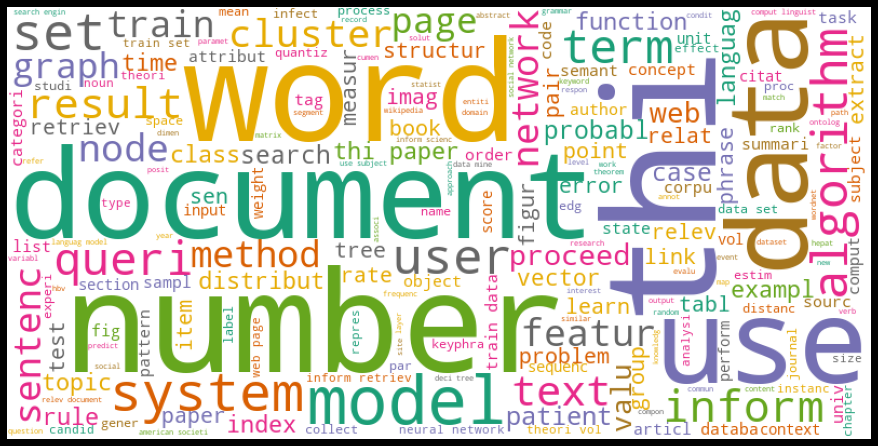

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
w = WordCloud(width=800, height=400, 
              background_color='white', colormap='Dark2').generate_from_frequencies(freq)
plt.figure(figsize=(12, 12), facecolor='k', edgecolor='k')
plt.imshow(w)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [13]:
exi = pd.read_csv("D:\CSE\Programs\Thesis\data\info\keyphrase_done_list.csv")



In [15]:
df_data = [{'paper_id': id, "TeKET":1}for id in already_extracted]
df = pd.DataFrame(df_data)
new = pd.concat([exi,df])
new.head()

,paper_id,TeKET,TextRank,SingleRank,TopicRank,TopicalPageRank,PositionRank,MultipartiteRank,FirstPhrases,TfIdf,KPMiner,YAKE
0,1887d7626acf9e277e5ef7657b796d637f11fcf9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26324601f7c25430adbbeec931b28cf11b2dbe81,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04ce064505b1635583fa0d9cc07cac7e9ea993cc,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03589e1917debe6df148cac8963fd008e4140237,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# new.to_csv('data\info\keyphrase_done_list.csv',index=False)


In [42]:
kp_done = pd.read_csv('data\info\keyphrase_done_list.csv')
kp_done.head()


,paper_id,TeKET,TextRank,SingleRank,TopicRank,TopicalPageRank,PositionRank,MultipartiteRank,FirstPhrases,TfIdf,KPMiner,YAKE
0,1887d7626acf9e277e5ef7657b796d637f11fcf9,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26324601f7c25430adbbeec931b28cf11b2dbe81,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,04ce064505b1635583fa0d9cc07cac7e9ea993cc,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,03589e1917debe6df148cac8963fd008e4140237,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1cf65a8c9e9ac8bd1db487004185ad0e15b9b9dd,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
done_info = kp_done[kp_done['paper_id'] ==
        '1887d7626acf9e277e5ef7657b796d637f11fcf9'].to_dict('records')
if not done_info:
    print("empty")
done_info = done_info[0]
done_info['TeKET']


1

## Main Algorithm

### init

In [12]:
from algorithms import getWeightedKeyPhrasesUsingTeKET, KeyPhrasesManager, get_cosine_similarity, get_jaccard_similarity
from graph.graph_info import GraphManager, InfoManager
from statistics import mean
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g: GraphManager = GraphManager()
g = g_serialized
g.inf.shape


(24387, 29)

### similarity [random]

In [101]:
km = KeyPhrasesManager("data/info/key_phrases_extracted.csv")

In [234]:
km.getKeyPhrasesList("b0d555a9ea67285fccd2ef8d887907bcc811f67a")


[('word', 7396),
 ('keyphra', 6400),
 ('keyphra extract', 4956),
 ('document', 4900),
 ('candid word', 3136),
 ('unsupervi keyphra extract', 2904),
 ('posit', 2500),
 ('proceed', 2304),
 ('research paper', 2160),
 ('page', 2116),
 ('dataset', 1936),
 ('perform baselin', 1872),
 ('model', 1764),
 ('paper', 1764),
 ('target document', 1720)]

In [258]:
root_paper = g.levelOrderList[0][0]
root_paper_id = root_paper['paper_id']
root_paper_uuid = root_paper['uuid']
root_paper_key_phrases = km.getKeyPhrasesList(root_paper_id)
root_paper_info = g.im.get_info_keys_by_uuid(root_paper_uuid, ['title'])

selected_papers = []

for i, level_i in enumerate(g.levelOrderList):
	if i == 0:
		continue
	score_list_level_i = []
	paper_count_in_level_i = len(level_i)
	for paper in level_i:
		paper_id = paper['paper_id']
		paper_uuid = paper['uuid']
		parent_paper_uuid = paper['parent_paper_uuid']
		average_list = []
		
		if not km.isKeyPhraseExist(paper_id):
			# console.log(f"[red]{paper_id} key phrases not exist[/]")
			continue
		paper_key_phrases = km.getKeyPhrasesList(paper_id)
		
		paper_info = g.im.get_info_keys_by_uuid(
			paper_uuid, ['title', 'freshness_avg'])
		parent_paper_id = g.im.get_info_keys_by_uuid(
			parent_paper_uuid, ['paper_id'])['paper_id']
		# cosine similarity between parent and child
		cosine_similarity_with_root = get_cosine_similarity(
			root_paper_key_phrases, paper_key_phrases)
		average_list.append(cosine_similarity_with_root)
		# jaccard similarity between parent and child

		jaccard_similarity_with_root = get_jaccard_similarity(
			root_paper_key_phrases, paper_key_phrases)
		average_list.append(jaccard_similarity_with_root)
		
		if km.isKeyPhraseExist(parent_paper_id):
			parent_paper_key_phrases = km.getKeyPhrasesList(parent_paper_id)		
			# cosine similarity between immediate parent and child
			cosine_similarity_with_immediate_parent = get_cosine_similarity(
				parent_paper_key_phrases, paper_key_phrases)
			average_list.append(cosine_similarity_with_immediate_parent)
			# jaccard similarity between immediate parent and child
			jaccard_similarity_with_immediate_parent = get_jaccard_similarity(
				parent_paper_key_phrases, paper_key_phrases)
			average_list.append(jaccard_similarity_with_immediate_parent)
		
		freshness = paper_info['freshness_avg']
		average_list.append(freshness)
		
		average = mean(average_list)
		print(average_list)
		print(average)
		# print(f"{paper_info['title']} {average_similarity}")
		# score_list_level_i.append(
		# 	{**paper, 'score': average_similarity, 'title': paper_info['title'], 'total_paper_count': paper_count_in_level_i})
		break

	score_list_level_i = sorted(
		score_list_level_i, key=lambda x: x['score'], reverse=True)

	# https://stackoverflow.com/questions/11092511/list-of-unique-dictionaries
	unique_papers_top_n = pd.DataFrame(score_list_level_i).drop_duplicates(subset=['paper_id']).to_dict(
		'records')

	# print(unique_papers_top_n[:2])

	selected_papers.append(unique_papers_top_n)
# pprint(selected_papers)

recommended_papers = [{**root_paper, "title": root_paper_info['title'], 'score': "~", 'total_paper_count':'1', "processed":"1"}]
for i, level_i in enumerate(selected_papers):
	# for paper in level_i:
	score_list_level_i = sorted(
		level_i, key=lambda x: x['score'], reverse=True)
	for paper in score_list_level_i:
		found = list(
			filter(lambda x: x['paper_id'] == paper['paper_id'], recommended_papers))
		# get papers that are not in recommended papers in upper level
		if not found:
			recommended_papers.append({**paper, "processed": len(level_i)})
			break
	
# recommended_papers


[0.6442125339507674, 0.2, 0.6442125339507674, 0.2, 0.512602335]
0.44020548058030695
[0.6781197599425767, 0.2, 0.8948786929888516, 0.2, 0.521797423]
0.49895917518628563
[0.406941430249269, 0.07142857142857142, 0.16038495233071093, 0.1111111111111111, 0.523483388]
0.2546698906239325
[0, 0.0, 0, 0.0, 0.473090939]
0.0946181878


In [4]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape


(24387, 31)

In [256]:
root_paper = g.levelOrderList[0][0]
root_paper_id = root_paper['paper_id']
root_paper_uuid = root_paper['uuid']
root_paper_key_phrases = km.getKeyPhrasesList(root_paper_id)
root_paper_key_phrases


[('word', 7396),
 ('keyphra', 6400),
 ('keyphra extract', 4956),
 ('document', 4900),
 ('candid word', 3136),
 ('unsupervi keyphra extract', 2904),
 ('posit', 2500),
 ('proceed', 2304),
 ('research paper', 2160),
 ('page', 2116),
 ('dataset', 1936),
 ('perform baselin', 1872),
 ('model', 1764),
 ('paper', 1764),
 ('target document', 1720)]

In [245]:
inf['similarity_with_root'] = np.nan
inf['similarity_with_immediate_parent'] = np.nan


In [265]:
inf.iloc[10].paper_id

'2a9b20d3467b5f6b5fa7bb4d4dabc36341e0914b'

In [276]:
paper_key_phrases = km.getKeyPhrasesList(
    "26ae952599aa9ba5815a80356024258247fc2b10")
paper_key_phrases


[('data mine practic machin learn tool', 104416),
 ('data mine practic machin learn', 77700),
 ('mine practic machin learn tool', 71300),
 ('practic machin learn tool', 69696),
 ('techniqu chapter', 55696),
 ('data mine practic machin', 54812),
 ('mine practic machin learn', 44896),
 ('practic machin learn', 39204),
 ('machin learn tool', 39204),
 ('data mine practic', 35752),
 ('mine practic machin', 24564),
 ('exampl data mine practic machin learn tool', 22464),
 ('data mine', 20520),
 ('practic machin', 17424),
 ('machin learn', 17424)]

In [23]:
get_cosine_similarity(root_paper_key_phrases, paper_key_phrases)

NameError: name 'root_paper_key_phrases' is not defined

In [285]:

for i, paper in inf.iterrows():
	if i == 0 :
		continue
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	parent_paper_uuid = paper['parent_paper_uuid']
	if not km.isKeyPhraseExist(paper_id):
		continue
	paper_key_phrases = km.getKeyPhrasesList(paper_id)
	cosine_similarity_with_root = get_cosine_similarity(
		root_paper_key_phrases, paper_key_phrases)
	# jaccard_similarity_with_root = get_jaccard_similarity(
    #         root_paper_key_phrases, paper_key_phrases)
	# save to info
	# score1 =  max(cosine_similarity_with_root,jaccard_similarity_with_root)
	inf.loc[inf['uuid'] == paper_uuid,
         "similarity_with_root"] = cosine_similarity_with_root
	
	parent_paper_id = g.im.get_info_keys_by_uuid(
            parent_paper_uuid, ['paper_id'])['paper_id']
	if km.isKeyPhraseExist(parent_paper_id):
		parent_paper_key_phrases = km.getKeyPhrasesList(parent_paper_id)
		cosine_similarity_with_immediate_parent = get_cosine_similarity(
                    parent_paper_key_phrases, paper_key_phrases)
		# jaccard_similarity_with_immediate_parent = get_jaccard_similarity(
        #             parent_paper_key_phrases, paper_key_phrases)
		# score2 = max(cosine_similarity_with_immediate_parent,
		#              jaccard_similarity_with_immediate_parent)
		inf.loc[inf['uuid'] == paper_uuid,
                    "similarity_with_immediate_parent"] = cosine_similarity_with_immediate_parent


### 🔰 Get Path 

In [93]:
root_uid = g.levelOrderList[0][0]['uuid']
for i, paper in inf.iterrows():
	if i == 0:
		continue
	paper_uid = paper['uuid']
	# print(paper_uuid)
	sequential_path = g.getPaths(root_uid, paper_uid, unique=True)
	sequential_path = ";".join(sequential_path)
	inf.loc[inf['uuid'] == paper_uid, "path_from_root"] = sequential_path

In [100]:
inf.iloc[10000].path_from_root.split(";")

['8bde6cb8-296d-4593-883f-b768103e1e69',
 'a2385e05-574d-4d3e-950e-9123496183fe',
 '56a881dd-caf6-4ea8-8753-73ad162d14e4',
 '7e34f546-76f1-46a7-a0f3-d5b02e7d0e3c']

In [41]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

In [4]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.columns


Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_id', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'freshness_avg',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'level_no', 'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2'],
      dtype='object')

In [130]:
inf['similarity_with_l1'] = np.nan
inf['similarity_with_l2'] = np.nan

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.array([root]),np.array([p1]))

### 🔰 Get Similarity Scores from immediate parents to root Using Path

In [136]:

for i, paper in inf.iterrows():
	if i == 0:
		continue
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	
	paper_key_phrases = km.getKeyPhrasesList(paper_id)
	if not km.isKeyPhraseExist(paper_id):
		continue
	papers_from_root = paper['path_from_root'].split(";") # getPaths Equivalent
	papers_from_root_till_immediate_parent = papers_from_root[:-1]
	for i, level_ith_parent_uid in enumerate(papers_from_root_till_immediate_parent):
		if i > 2:
			break
		level_ith_parent_paper_id = g.im.get_info_keys_by_uuid(level_ith_parent_uid, ['paper_id'])['paper_id']
		if km.isKeyPhraseExist(level_ith_parent_paper_id):
			u = km.getKeyPhrasesList(level_ith_parent_paper_id)
			cosine_similarity = get_cosine_similarity(u, paper_key_phrases)
			if i == 1:
				inf.loc[inf['uuid'] == paper_uuid, "similarity_with_l1"] = cosine_similarity
			elif i == 2:
				inf.loc[inf['uuid'] == paper_uuid, "similarity_with_l2"] = cosine_similarity


### with embedding

In [3]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.columns


Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_id', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'freshness', 'in_deg_centrality', 'out_deg_centrality',
       'eigenvector_centrality', 'load_centrality',
       'citation_count_standard_norm', 'age_standard_norm'],
      dtype='object')

In [4]:
root = inf.iloc[0]['embedding'].split(':')[1].split(",")[:-1]
# root = [float(i) for i in root if i != ""]
root[:5]

['-3.3292479515075684',
 '-1.6170390844345093',
 '-0.41584455966949463',
 '2.3501198291778564',
 '-0.5364987850189209']

In [5]:
p1 = inf.iloc[1]['embedding'].split(':')[1].split(",")[:-1]
# p1 = [float(i) for i in p1 if i !='']


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.array([root]),np.array([p1]))

array([[0.72775035]])

In [7]:
inf.iloc[1]['similarity_with_l0']

0.6442125339507674

In [8]:
inf['embedding'].isnull().sum()


0

In [9]:
pd.isna(inf.iloc[1]['embedding'])


False

In [10]:
inf['similarity_with_l0_em'] = np.nan
inf['similarity_with_l1_em'] = np.nan
inf['similarity_with_l2_em'] = np.nan


In [14]:

for i, paper in inf.iterrows():
	if i == 0:
		continue
	# if  i>10:
	# 	break
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	paper_embedding = paper['embedding']
	if pd.isna(paper_embedding):
		continue
	paper_embedding = paper_embedding.split(':')[1].split(",")[:-1]
	
	# !!!
	papers_from_root = paper['path_from_root'].split(";")
	papers_from_root_till_immediate_parent = papers_from_root[:-1]
	
	for i, level_ith_parent_uid in enumerate(papers_from_root_till_immediate_parent):
	# !!!
		if i > 2:
			break
		level_ith_parent_info = g.im.get_info_keys_by_uuid(
			level_ith_parent_uid, ['paper_id','embedding'])
		level_ith_parent_paper_embedding = level_ith_parent_info['embedding']
		# level_ith_parent_paper_id = level_ith_parent_info['paper_id']
		if not pd.isna(level_ith_parent_paper_embedding):
			p_parents_em = level_ith_parent_paper_embedding.split(':')[
						1].split(",")[:-1]
			s = cosine_similarity(np.array([p_parents_em]), np.array([paper_embedding]))[0][0]
			if i == 0:
				inf.loc[inf['uuid'] == paper_uuid,"similarity_with_l0_em"] = s
			elif i == 1:
				inf.loc[inf['uuid'] == paper_uuid,"similarity_with_l1_em"] = s
			elif i == 2:
				inf.loc[inf['uuid'] == paper_uuid,"similarity_with_l2_em"] = s


In [ ]:
inf[inf['similarity_with_l0_em']]


In [28]:
inf['similarity_with_immediate_parent_em'] = np.nan


In [34]:
for i, paper in inf.iterrows():
	if i == 0:
		continue
	# if  i>100:
	# 	break
	paper_id = paper['paper_id']
	paper_uuid = paper['uuid']
	parent_paper_uuid = paper['parent_paper_uuid']
	paper_embedding = paper['embedding']
	if pd.isna(paper_embedding):
		continue
	paper_embedding = paper_embedding.split(':')[1].split(",")[:-1]

	parent_paper_info = g.im.get_info_keys_by_uuid(
            parent_paper_uuid, ['paper_id','embedding'])
	parent_paper_id =parent_paper_info['paper_id']
	parent_paper_embedding = parent_paper_info[ 'embedding']
	parent_paper_embedding = parent_paper_embedding.split(':')[
    1].split(",")[:-1]
	s = cosine_similarity(np.array([p_parents_em]), np.array([paper_embedding]))[0][0]
	inf.loc[inf['uuid'] == paper_uuid,
                    "similarity_with_immediate_parent_em"] = s


In [138]:
inf.drop(['similarity_with_l3'], axis=1, inplace=True)


In [73]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

### vis all

In [76]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
print(inf.shape)
data = inf.iloc[1:]
data = data[data['level_no'] != 4]


(24387, 36)


In [75]:
inf.columns


Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_id', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'freshness'],
      dtype='object')

<AxesSubplot:xlabel='Level', ylabel='Scores'>

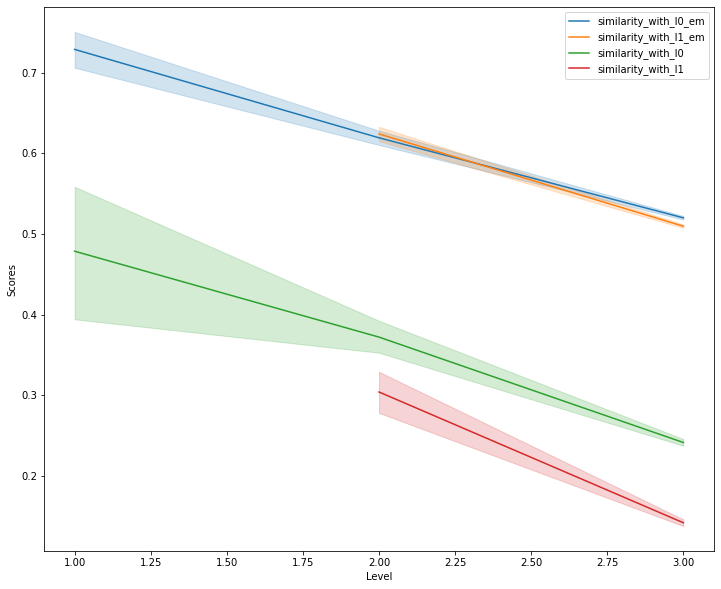

In [92]:
plt.figure(figsize=(12, 10))
plt.ylabel("Scores")
plt.xlabel("Level")

sns.lineplot(data=data, x='level_no', y='similarity_with_l0_em',
             legend='brief', label='similarity_with_l0_em')
sns.lineplot(data=data, x='level_no', y='similarity_with_l1_em',
             legend='brief', label='similarity_with_l1_em')
sns.lineplot(data=data, x='level_no', y='similarity_with_l0',
             legend='brief', label='similarity_with_l0')
sns.lineplot(data=data, x='level_no', y='similarity_with_l1',
             legend='brief', label='similarity_with_l1')

# sns.lineplot(data=data, x='level_no', y='similarity_with_immediate_parent_em',
#              legend='brief', label='similarity_with_immediate_parent_em')
# sns.lineplot(data=data, x='level_no', y='similarity_with_immediate_parent',
#              legend='brief', label='similarity_with_immediate_parent')
# sns.lineplot(data=data, x='level_no', y='degree_centrality',
#              legend='brief', label='degree_centrality')
# sns.lineplot(data=data, x='level_no', y='betweenness_centrality',
#              legend='brief', label='betweenness_centrality')
# sns.lineplot(data=data, x='level_no', y='closeness_centrality',
#              legend='brief', label='closeness_centrality')

# sns.lineplot(data=data, x='level_no', y='similarity_with_l2_em',
#              legend='brief', label='similarity_with_l2_em')


<Figure size 2160x2160 with 0 Axes>

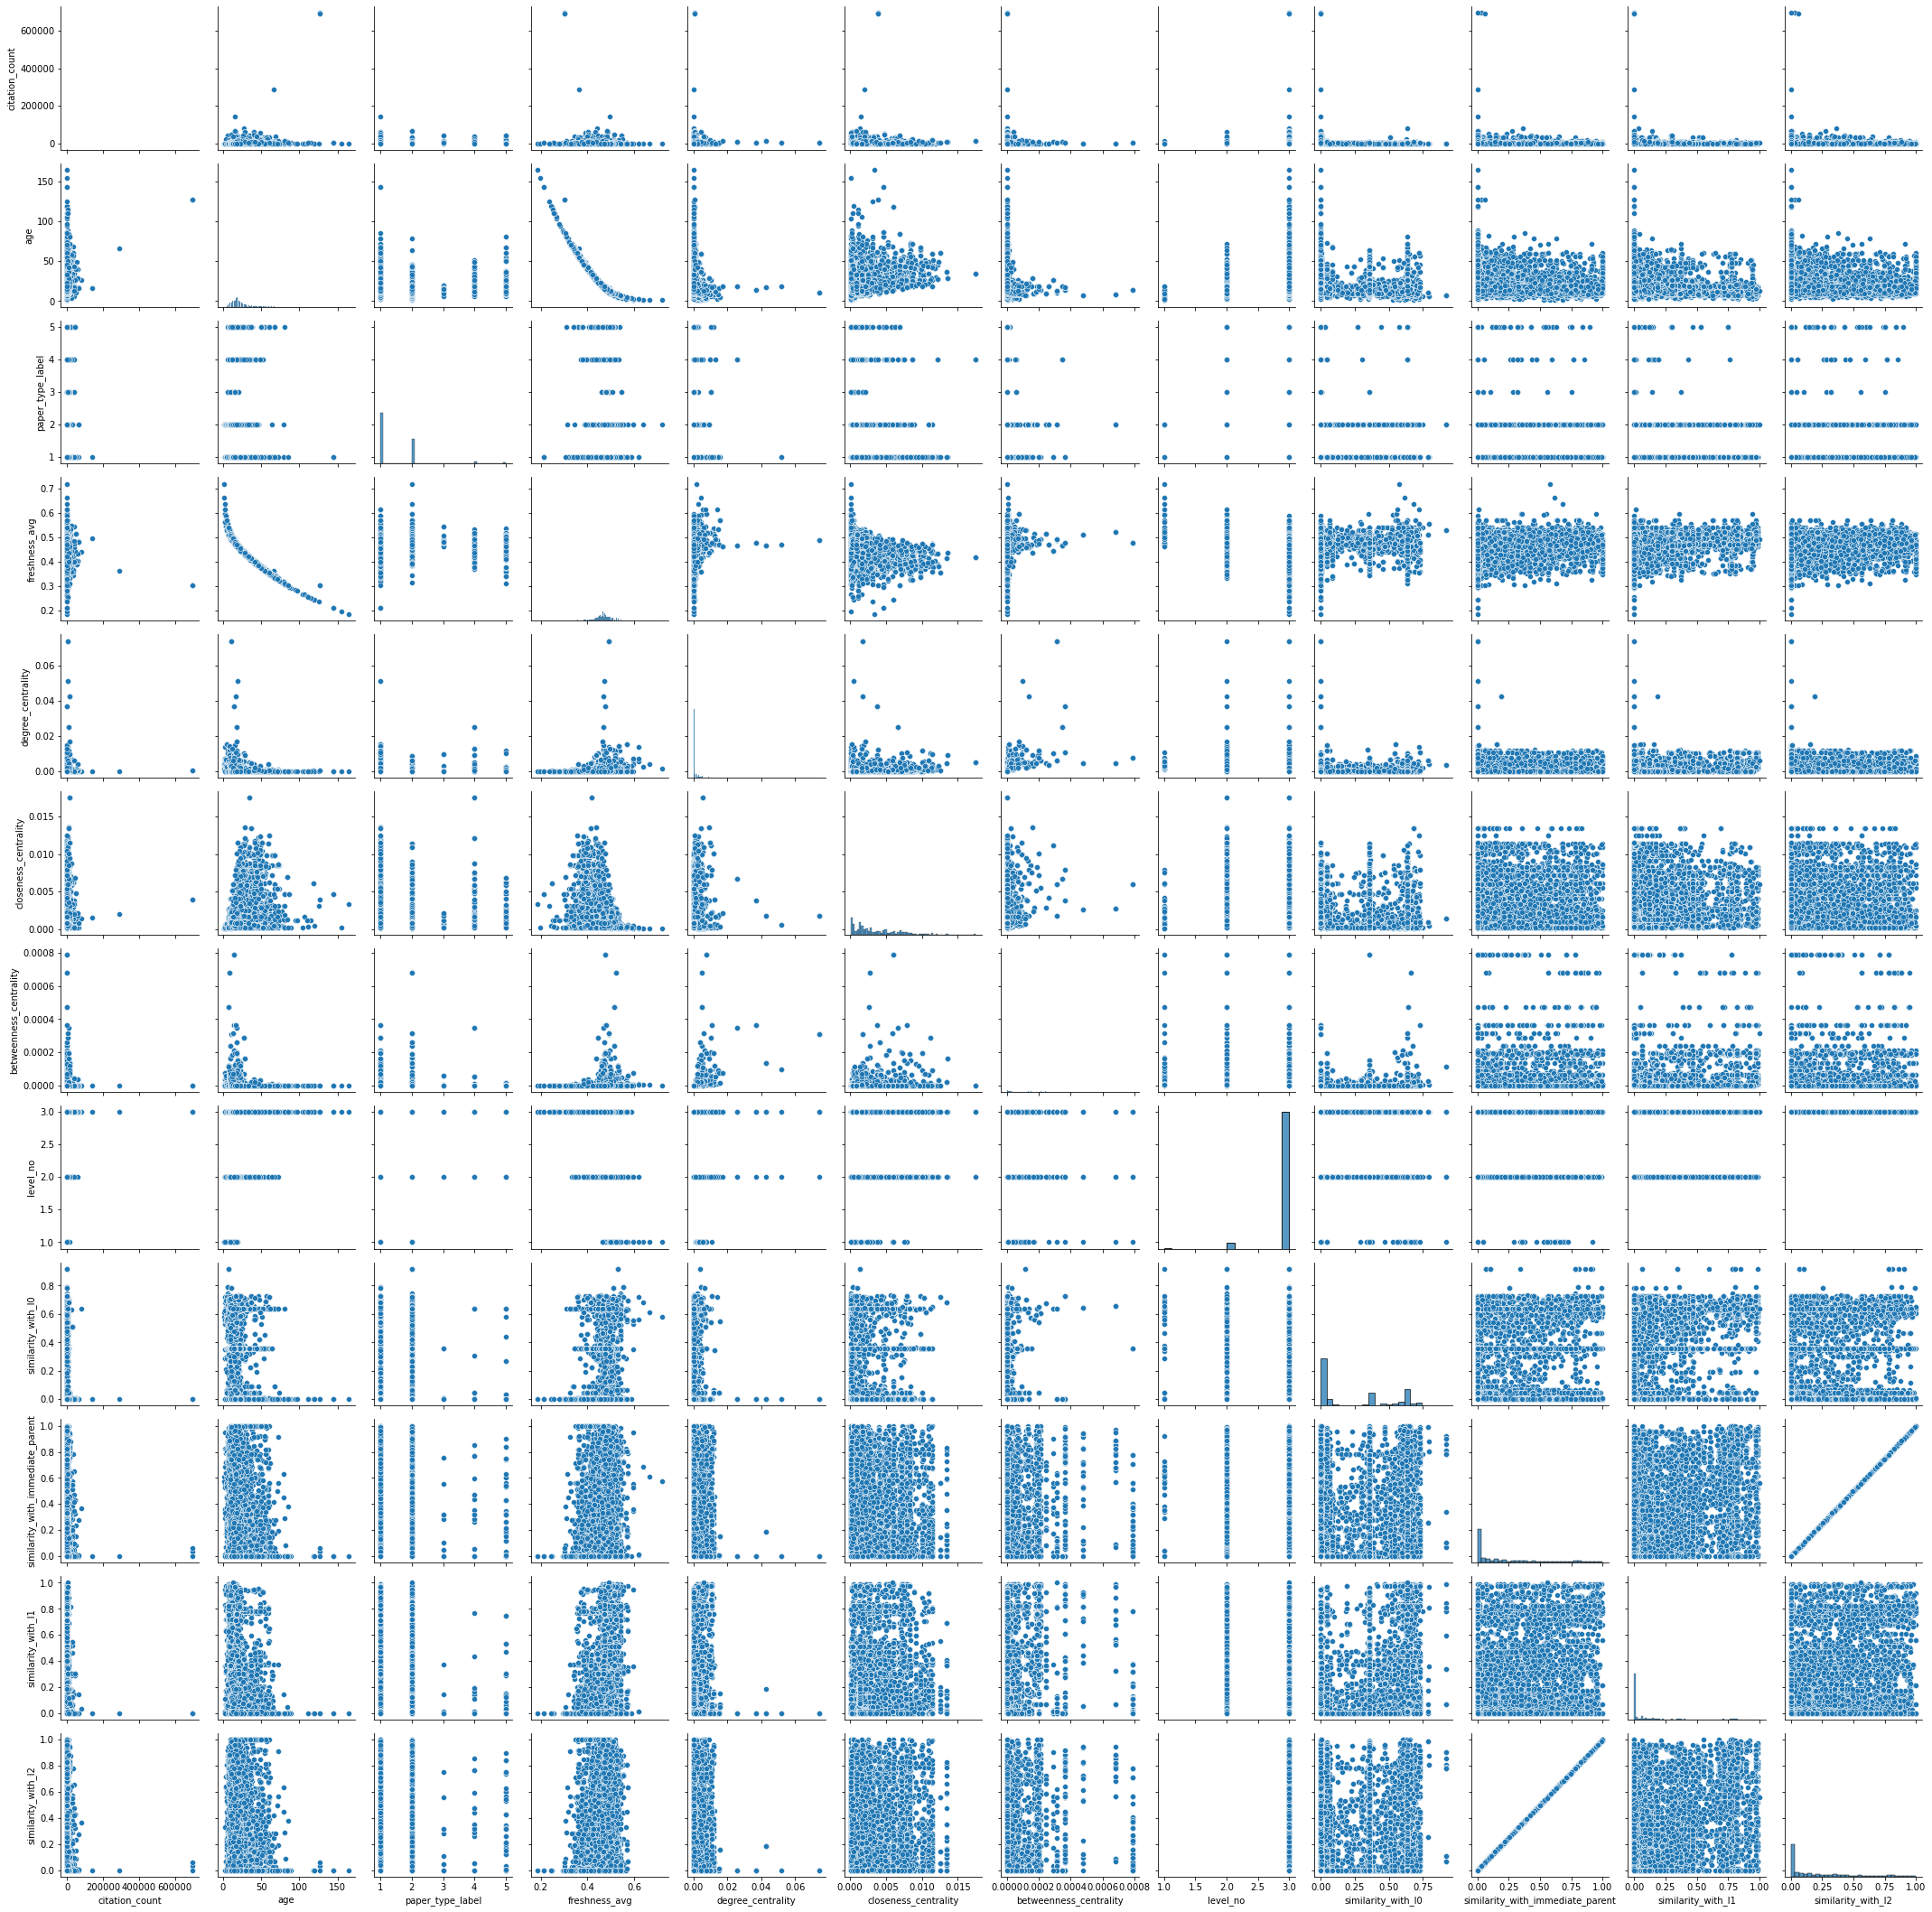

In [143]:
set_matplotlib_formats('png')
plt.figure(figsize=(30, 30))
cols = ['citation_count', 'age', 'paper_type_label', 'freshness', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'level_no',
        'similarity_with_l0', 'similarity_with_immediate_parent', 'similarity_with_l1', 'similarity_with_l2']
g = sns.PairGrid(data,vars=cols)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
# g.add_legend()
# plt.show()
# plt.savefig('pairplot.pdf',dpi=300)
# set_matplotlib_formats('png')


<AxesSubplot:xlabel='cols', ylabel='vals'>

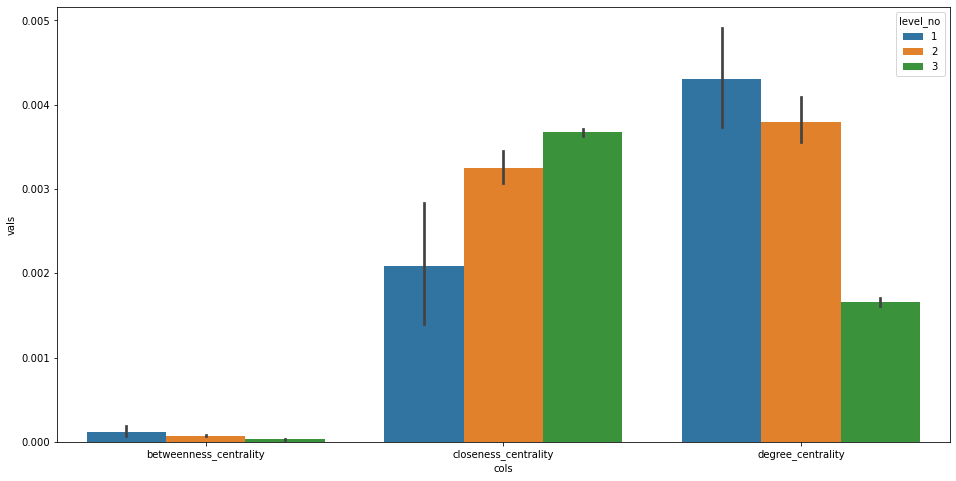

In [89]:
selectedDf = data[['level_no', 'similarity_with_l0_em', 'similarity_with_l1_em',
                   'similarity_with_l2_em', 'similarity_with_immediate_parent_em', 'freshness']]
# selectedDf = data[['level_no', 'similarity_with_l0', 'similarity_with_l1',
#                    'similarity_with_l2', 'similarity_with_immediate_parent', 'freshness']]
selectedDf = data[['level_no', 'betweenness_centrality', 'closeness_centrality','degree_centrality']]

# display(selectedDf.head(3))

melteddf = selectedDf.melt('level_no', var_name='cols', value_name='vals')
# display(melteddf)
plt.figure(figsize=(16,8))
sns.barplot(data=melteddf, x="cols", y="vals", hue='level_no')



In [93]:
data.corr()

,reference_count,citation_count,influential_citation_count,published_date,isOpenAccess,age,citation_count_min_max_norm,age_min_max_norm,degree_centrality,closeness_centrality,...,similarity_with_l0,similarity_with_immediate_parent,paper_type_label,similarity_with_l1,similarity_with_l2,similarity_with_l0_em,similarity_with_l1_em,similarity_with_l2_em,similarity_with_immediate_parent_em,freshness
reference_count,1.000000,0.041704,0.033685,0.154406,0.088602,-0.154406,0.041704,-0.154406,0.495377,-0.028427,...,-0.046746,-0.036648,-0.001319,-0.021409,-0.034548,0.078481,0.073171,0.083708,0.040818,0.123703
citation_count,0.041704,1.000000,0.959521,-0.160677,0.038266,0.160677,1.000000,0.160677,0.066322,0.083258,...,-0.061210,-0.058313,0.224752,-0.048636,-0.056742,-0.060551,-0.058818,-0.074514,-0.074303,-0.055959
influential_citation_count,0.033685,0.959521,1.000000,-0.123869,0.028218,0.123869,0.959521,0.123869,0.074186,0.075257,...,-0.044202,-0.048483,0.149723,-0.041284,-0.047070,-0.031049,-0.032974,-0.050397,-0.046034,-0.026496
published_date,0.154406,-0.160677,-0.123869,1.000000,0.058114,-1.000000,-0.160677,-1.000000,0.155723,-0.324500,...,0.140055,0.167618,0.105726,0.159530,0.160453,0.417537,0.374429,0.327082,0.414430,0.867143
isOpenAccess,0.088602,0.038266,0.028218,0.058114,1.000000,-0.058114,0.038266,-0.058114,0.084904,0.039905,...,0.048124,-0.007983,-0.047094,-0.003912,-0.005816,0.164199,0.163349,0.145335,0.129907,0.061581
age,-0.154406,0.160677,0.123869,-1.000000,-0.058114,1.000000,0.160677,1.000000,-0.155723,0.324500,...,-0.140055,-0.167618,-0.105726,-0.159530,-0.160453,-0.417537,-0.374429,-0.327082,-0.414430,-0.867143
citation_count_min_max_norm,0.041704,1.000000,0.959521,-0.160677,0.038266,0.160677,1.000000,0.160677,0.066322,0.083258,...,-0.061210,-0.058313,0.224752,-0.048636,-0.056742,-0.060551,-0.058818,-0.074514,-0.074303,-0.055959
age_min_max_norm,-0.154406,0.160677,0.123869,-1.000000,-0.058114,1.000000,0.160677,1.000000,-0.155723,0.324500,...,-0.140055,-0.167618,-0.105726,-0.159530,-0.160453,-0.417537,-0.374429,-0.327082,-0.414430,-0.867143
degree_centrality,0.495377,0.066322,0.074186,0.155723,0.084904,-0.155723,0.066322,-0.155723,1.000000,0.333930,...,0.216078,0.064511,0.081921,0.215792,0.062851,0.276503,0.233100,0.100839,0.274636,0.155703
closeness_centrality,-0.028427,0.083258,0.075257,-0.324500,0.039905,0.324500,0.083258,0.324500,0.333930,1.000000,...,0.273598,-0.011314,-0.045358,0.164889,-0.009797,0.152267,0.111372,0.001185,0.135722,-0.399675


In [95]:
data = data[['reference_count', 'citation_count', 'influential_citation_count','age',
             'freshness', 'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
             'similarity_with_l0_em', 'similarity_with_immediate_parent', 'similarity_with_l1_em', 'similarity_with_l2_em', 'similarity_with_immediate_parent_em']]


<AxesSubplot:>

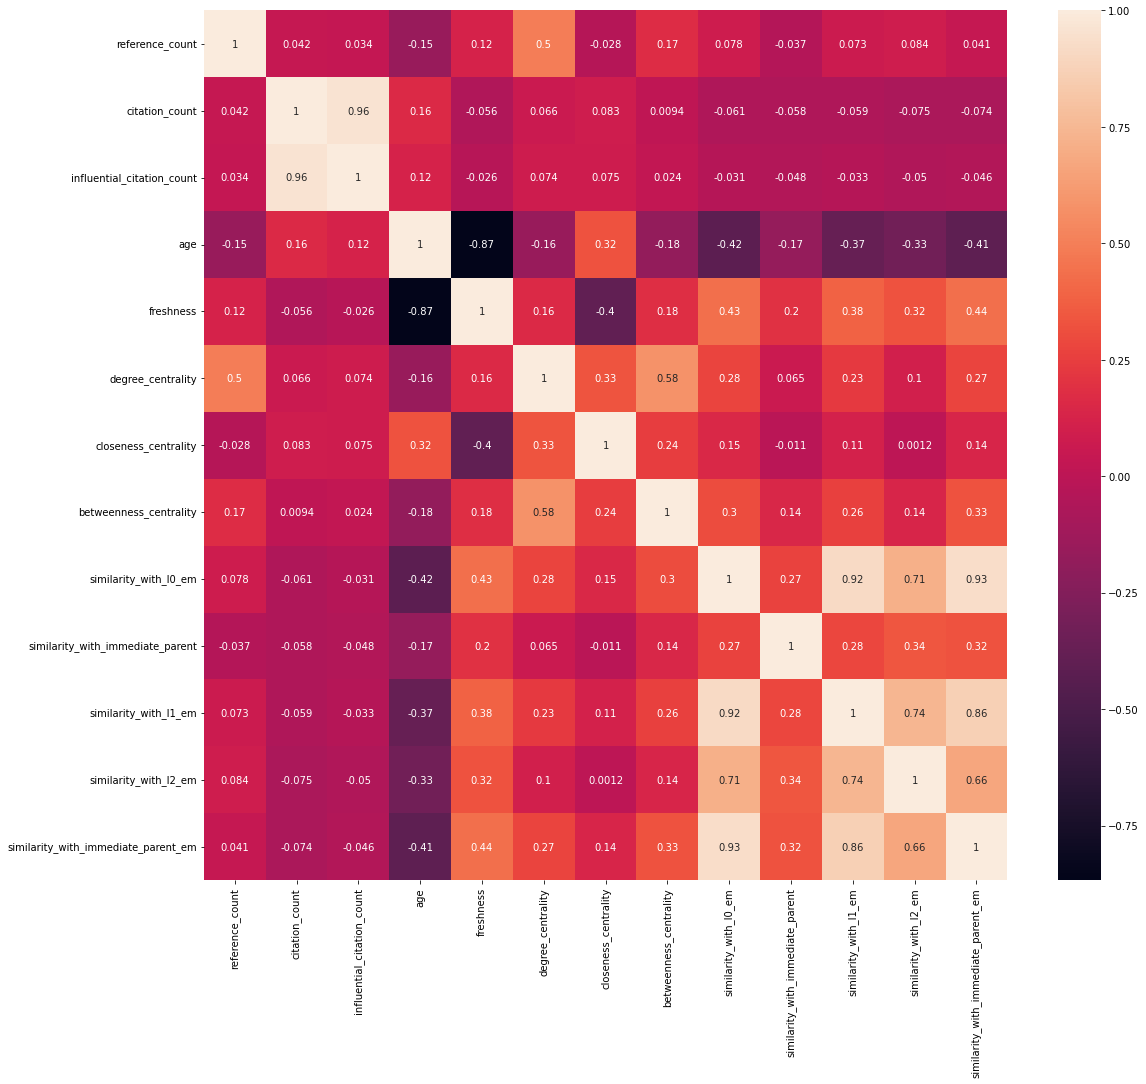

In [96]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(),annot=True)